In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import plotly.graph_objects as go

from normflows import flows

%matplotlib inline

%load_ext autoreload
%autoreload 2

### Beginning with a simple mean field gaussian

In [2]:
ndim = 2
mu0 = np.zeros(ndim)
Sigma0 = np.eye(ndim)
N = 1000
nbins = 300

samples = np.random.multivariate_normal(mu0, Sigma0, size=N)



In [58]:
def density_plot_2d(samples, ax=None, title=None):
    if ax is None:
        plotter = plt
    else:
        plotter = ax
        
    nbins = 300
    x, y = samples[:, 0], samples[:, 1]
    density = sp.kde.gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = density(np.vstack([xi.flatten(), yi.flatten()]))
    plotter.pcolormesh(xi, yi, zi.reshape(xi.shape))
    plotter.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Reds_r)
    if title is not None:
        plotter.title(title)
    plotter.xlabel('$x$')
    plotter.ylabel('$y$')

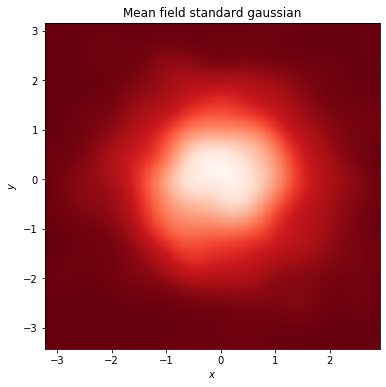

In [40]:
plt.figure(figsize=(6, 6))
density_plot_2d(samples)
plt.show()

In [55]:
w = np.array([8, -1]) * -1
u = np.array([-4, 6])
b = 10

w2 = np.array([4, 4])
u2 = np.array([4, 6])
b2 = -3


pf1 = lambda z: flows.planar_flow(z, w, u, b)
pf2 = lambda z: flows.planar_flow(z, w2, u2, b2)

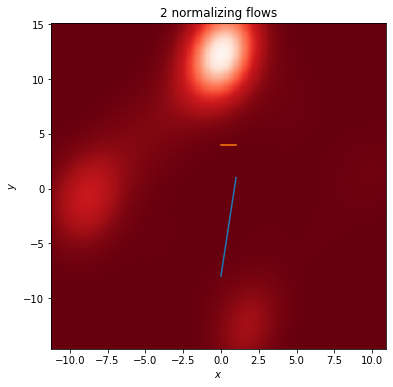

In [61]:
plt.figure(figsize=(6, 6))
density_plot_2d(pf2(pf1(samples)), title='2 normalizing flows')
plt.plot(w)
plt.plot(w2)
plt.show()

In [ ]:
fig = go.Figure()

